<a href="https://colab.research.google.com/github/anshulbhute/Machine-Learning-Lab/blob/main/Bonus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Kaggle (assume it has been downloaded as 'titanic.csv')
data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print("Initial data preview:")
print(data.head())

Initial data preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05


Missing values after cleaning:
PassengerId    0
Survived       0
dtype: int64

Correlation matrix:
             PassengerId  Survived
PassengerId      1.00000  -0.05015
Survived        -0.05015   1.00000


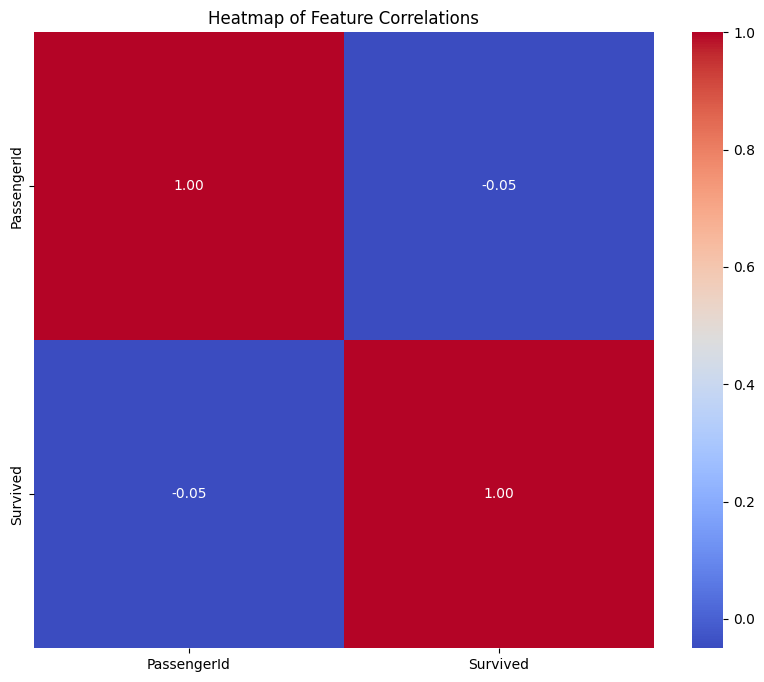

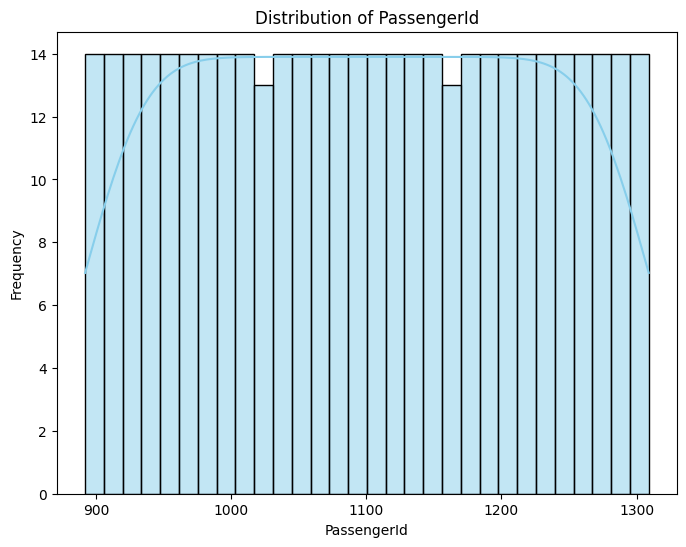

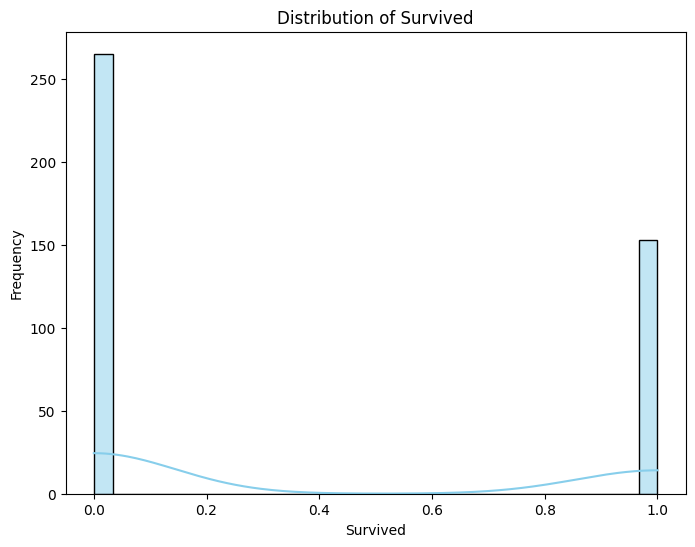


Cleaned data exported to titanic_cleaned.csv


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filename = "titanic.csv"  # Replace with the correct path to your dataset
data = pd.read_csv(filename)

# Proceed with your data processing and analysis
if 'Age' in data.columns:
    data['Age'].fillna(data['Age'].median(), inplace=True)

if 'Embarked' in data.columns:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.savefig("correlation_heatmap.png")
plt.show()

# Distribution of numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.savefig(f"distribution_{column}.png")
    plt.show()

# Export cleaned data to a new CSV file
cleaned_filename = "titanic_cleaned.csv"
data.to_csv(cleaned_filename, index=False)
print(f"\nCleaned data exported to {cleaned_filename}")